<a href="https://colab.research.google.com/github/RodolfoGaspar/ImersaoDadosAlura2020/blob/main/Gabrielle_Desire%C3%A9_Cardoso_de_Souza.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <h1>OS ATRASADOS DO ENEM</h1>
*by Gabrielle Desireé*

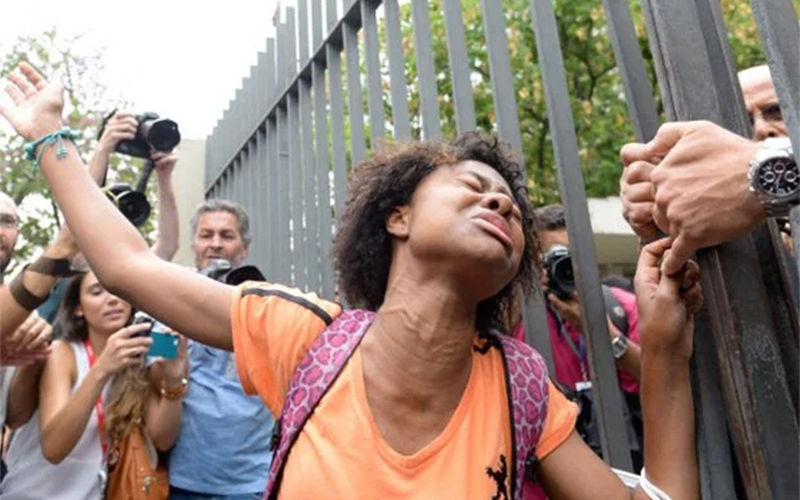

O ENEM 2019 teve cerca de 5 milhões de inscritos, e bateu recorde de audiência, com o menor número de ausentes nos últimos 10 anos [[1]](https://vestibular.mundoeducacao.uol.com.br/noticias/enem-2019-termina-com-menor-indice-de-ausentes-da-historia/340019.html). Números que merecem comemoração!! **Será?** 

Segundo o INEP, o exame custa cerca R$105,52 por aluno [[2]](https://agenciabrasil.ebc.com.br/educacao/noticia/2019-10/enem-devera-custar-r-105-52-por-participante-estima-inep#:~:text=O%20Exame%20Nacional%20do%20Ensino,%24%20105%2C52%20por%20participante.). Isso significa que a marca de ~apenas~ 27% de ausência, ou 1.385.789 de pessoas faltantes  [[1]](https://vestibular.mundoeducacao.uol.com.br/noticias/enem-2019-termina-com-menor-indice-de-ausentes-da-historia/340019.html). , pode representar prejuízos aos cofres públicos, já que o MEC arca com cerca de 2/3 dos custos da prova [[2]](https://agenciabrasil.ebc.com.br/educacao/noticia/2019-10/enem-devera-custar-r-105-52-por-participante-estima-inep#:~:text=O%20Exame%20Nacional%20do%20Ensino,%24%20105%2C52%20por%20participante.). 

Isso sem mencionar mais de um quarto dos inscritos ficou mais longe do sonho de entrar na universidade, mudar de vida, dar um retorno a sociedade brasileira e encher de orgulho sua família, amigos e professores.

Então por que ainda aguardamos ansiosamente e para ver memes dos atrasados do ENEM? Por que temos inúmeras matérias sobre os alunos de redação nota 1000, os prodígios que ingressam nas faculdades de medicina com 16 anos e histórias de superação incríveis e os ausentes do ENEM são apenas números sem explicação? Dados ignorados. Mais de 1 milhão e 300 mil pessoas resumidos a um conjunto de memes de portas e oportunidades fechadas.

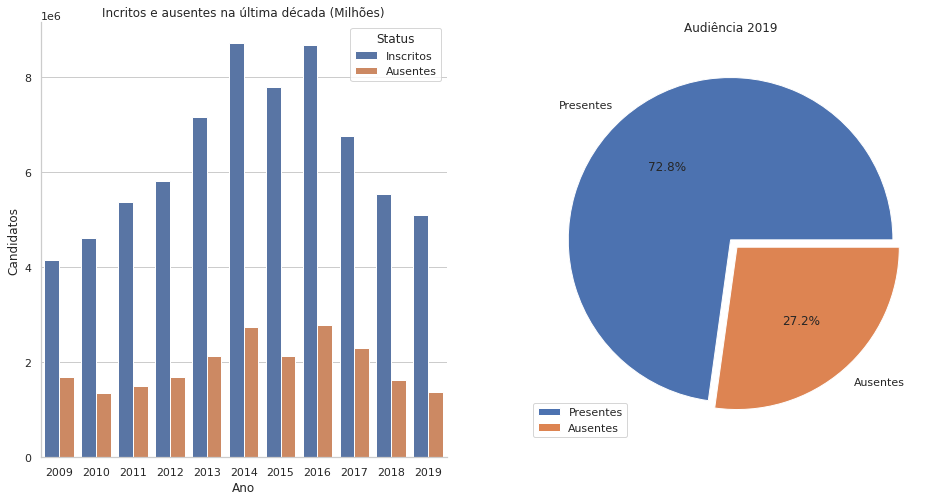

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set(style="whitegrid")
cmap = sns.color_palette("Blues")

#lendo dados a audiencia do ENEM - Fonte: Mundo Educação - UOL
audiencia_ENEM = pd.read_csv("/content/drive/My Drive/Imersão Dados - Alura/ENEM_Audiencia_MUNDO_EDUCACAO_UOL.csv")

fig, axs = plt.subplots(1, 2, figsize = (16,8))
serie_historica = sns.barplot(x = "Ano", y ="Candidatos", hue="Status", data= audiencia_ENEM, ax = axs[0])
serie_historica.title.set_text("Incritos e ausentes na última década (Milhões)")
sns.despine()

insc2019 = 5095388
aus2019 = 1385579
aus2019 = aus2019/insc2019

ano2019 = pd.DataFrame({'':[(1-aus2019), aus2019]}, index=['Presentes', 'Ausentes'])
prop2019 =ano2019.plot.pie(y='',explode = [0., .06], autopct='%1.1f%%', ax = axs[1])
prop2019.title.set_text("Audiência 2019")

# Aspectos relevantes dessa análise

Esse documento foi realizado no contexto da Imersão Dados, realizada pela [Alura](https://www.alura.com.br/). Durante 5 dias, foram fornecidas aulas e lives relacionadas a ciência de dados. <div>
 
A proposta era mergulhar nos dados do ENEM 2019 e pescar conclusões sobre o cenário da educação brasileira. Para isso, foi utilizada uma [amostra](https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv)  pré-processada dos [microdados disponíveis no site do INEP](http://inep.gov.br/microdados). A [amostra](https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv) [[3]](http://inep.gov.br/microdados). A [amostra](https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv)foi gerada aleatoriamente e está disponível em no github. Além dos dados, o INEP também fornece um [dicionário](https://github.com/alura-cursos/imersao-dados-2-2020/tree/master/DICION%C3%81RIO) para melhor compreensão dos dados.

In [ ]:
fonte = "https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv?raw=true"

amostra = pd.read_csv(fonte)

> <h3>Representatividade da amostra </h3>

Por se tratar de uma amostra de um oceano de dados, é necessário observar se os dados utilizados são representativos frente ao conjunto de dados originais.

Para isso, será analisado se a distribuição geográfica, a proporção dos ausentes (que objeto de estudo dessa análise) são coerentes com os dados totais.


> **Distribuição geográfica**


O gráfico abaixo aponta que amostra e dados totais tem proporção semelhante entre os estados, o que mostra, que a amostra representa bem o todo.

*Os dados totais estão disponíveis no site do INEP, mas aqui o recorte tem origem do jornal Estado de Minas[[3]](https://www.em.com.br/app/noticia/especiais/educacao/2019/05/17/internas_educacao,1054674/enem-2019-ja-tem-seis-milhoes-de-inscritos-um-terco-dos-participantes.shtml)*

Text(0.5, 1.0, 'Comparação entre as distribuições geográficas: Amostra x Dados Totais')

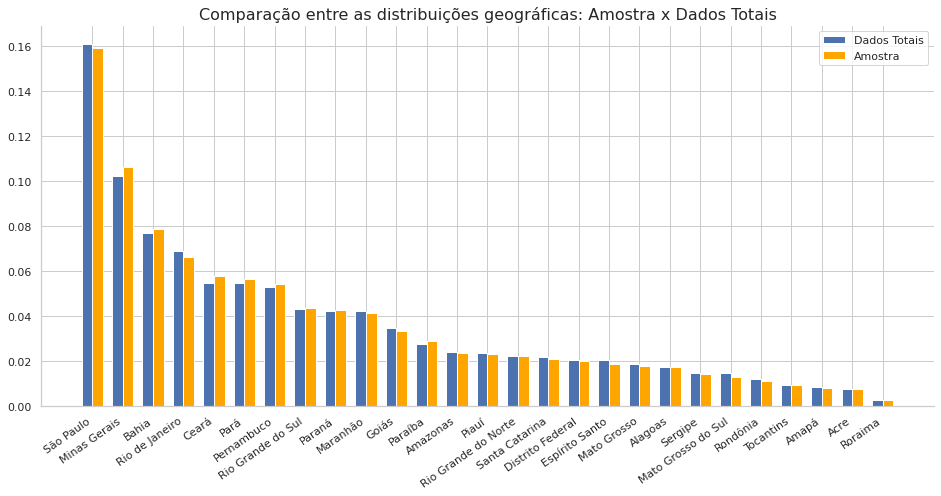

In [ ]:
#Proporção de inscristos por estados - No total de inscritos
total = pd.read_csv("/content/drive/My Drive/Imersão Dados - Alura/Inscritos_Estado_JORNAL_ESTADO_DE_MINAS.csv")

total_ord = total.sort_values(by='Inscritos', ascending= False)
geo_total = total["Normalizado"] = (total['Inscritos'])/(total['Inscritos'].sum())


#Obtendo a proporção de inscritos por estados na amostra
geo_parcial = amostra["SG_UF_RESIDENCIA"].value_counts(normalize = True).sort_values(ascending= False)


plt.figure(figsize = (16,7))
labels = total_ord["Unidade da Federação"]

i = np.arange(len(labels))
width = 0.35

bar_amostra = plt.bar(labels,geo_total.sort_values(ascending= False), 
                      width=-1.*width, align='edge',color='b', label="Dados Totais")
bar_amostra = plt.bar(labels,geo_amostra , width=width, align='edge',
                      color='orange', label="Amostra")

location = ind+width/2
labels=labels
plt.xticks(labels,rotation=35, ha ="right")
sns.despine()
plt.legend()
plt.title("Comparação entre as distribuições geográficas: Amostra x Dados Totais", fontsize = 16)


> **Distribuição dos inscritos**

A diferença entre o percentual de presentes e ausentes na amostra e no total praticamente não existe. O que mais uma vez mostra que podemos tirar boas conclusões sobre o ENEM 2019 através da amostra.

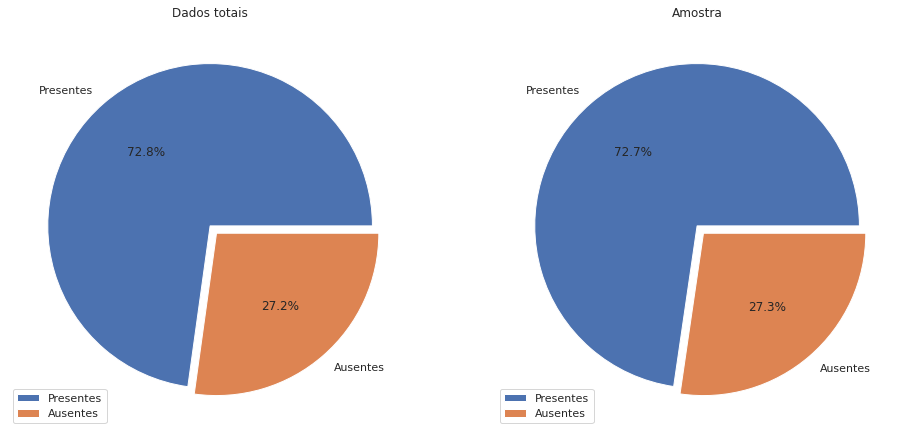

In [ ]:
ausentes = len(amostra.query("TP_PRESENCA_CN ==0 |TP_PRESENCA_CH ==0 | TP_PRESENCA_LC ==0 | TP_PRESENCA_MT ==0"))

ausentes = ausentes/len(amostra)

aus= pd.DataFrame({'':[(1-ausentes), ausentes]}, index=['Presentes', 'Ausentes'])

fig, axs = plt.subplots(1, 2, figsize = (16,8))

prop2019 =ano2019.plot.pie(y='', explode = [0., .06], autopct='%1.1f%%', ax = axs[0])
prop2019.title.set_text("Dados totais")

prop2019 =aus.plot.pie(y='',explode = [0., .06], autopct='%1.1f%%', ax = axs[1])
prop2019.title.set_text("Amostra")


# Aluno nota ZERO

Antes de mais nada, é preciso saber que praticamente todos os alunos que tiraram nota zero faltaram as provas, menos de 1% dos candidatos infrigiram alguma regra e foram eliminados. Então, no ENEM 2019, **NOTA ZERO = AUSÊNCIA**.

Text(0.5, 1.0, 'Candidato nota zero')

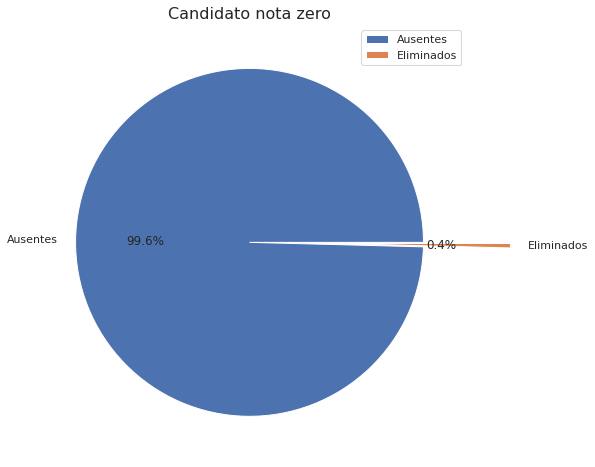

In [ ]:
provas = ["NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_MT","NU_NOTA_LC","NU_NOTA_REDACAO"]

#somando as notas das provas
amostra["NU_NOTA_TOTAL"] = amostra[provas].sum(axis=1)

#identificando os alunos que zeraram a prova
nota_zero = amostra.query("NU_NOTA_TOTAL ==0")

#No dicionário dos dados:
    #Codigo de presença = 0 significa que o candidato não compareceu a prova
    #Codigo de presença = 2 significa que ele foi eliminado 
ausente = pd.DataFrame(nota_zero.query("TP_PRESENCA_CN ==0 |TP_PRESENCA_CH ==0 | TP_PRESENCA_LC ==0 | TP_PRESENCA_MT ==0"))
eliminado = (nota_zero.query("TP_PRESENCA_CN == 2 |TP_PRESENCA_CH == 2 | TP_PRESENCA_LC == 2 | TP_PRESENCA_MT ==2"))

ausentes = len(ausente)
eliminados = len(eliminado)


df = pd.DataFrame({'':[ausentes, eliminados]}, index=['Ausentes', 'Eliminados'],)

df.plot.pie(y='', figsize= (8,8), explode = [0., .5],autopct='%1.1f%%')

plt.title("Aluno nota zero" , fontsize = 16)

> **Apenas números**

Os tão comentados alunos nota 1000 na redação representam um percentual muito pequeno dos candidatos. Em 2019, dos pouco mais de 5 milhões que se inscreveram, apenas 53 alcançaram esse feito e por isso devem celebrados. [[4]](https://educacao.uol.com.br/noticias/2020/01/17/enem-2019-53-candidatos-tiraram-nota-mil-na-redacao-143-mil-tiraram-zero.htm)

Todos querem entrevistar essa pessoas. Querem saber o que comem, de onde vieram, que livros gostam. Querem saber o que os levou a esse momento, mesmo sabendo que provavelmente as pessoas que vão tirar nota 1000 no ano seguinte serão completamente diferentes, sendo praticamente impossível prever quem vai tirar nota 1000 no ano seguinte, ou criar uma rotina baseada na desses candidatos para fazer com que mais pessoas cheguem lá.

Já os 27% que zeraram a prova são encarados apenas como números, não há investigação ou curiosidade, o matéria de jornal sobre o tema, mesmo sabendo do impacto que isso gera nas pessoas e na sociedade e que, ano após ano, um número considerável de pessoas não aparece no ENEM. 






> **De olho no boletim**

O Brasil é um país de desigualdades, então é se esperar que as populações mais ricas tirem as maiores notas. 

Observando as notas a partir da renda familiar, percebe-se que as notas mais baixas se concentram em populações mais pobres. É notório também, que são também são esses alunos que mais tiraram nota zero. Lembrando que nota zero significa faltar a prova.



/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


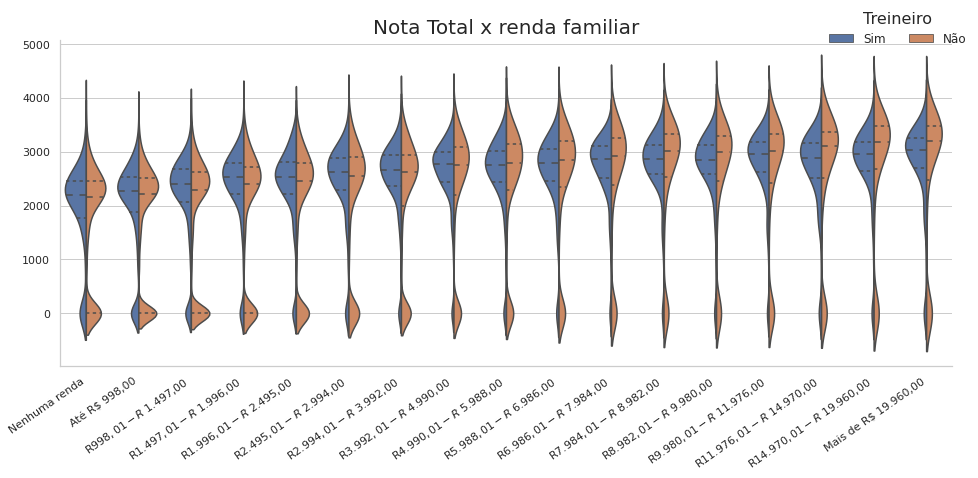

In [ ]:
#Dicionário dos códigos de renda
renda = [ 'Nenhuma renda',
              'Até R$ 998,00',
              'R$ 998,01 - R$ 1.497,00',
              'R$ 1.497,01 - R$ 1.996,00',
              'R$ 1.996,01 - R$ 2.495,00',
              'R$ 2.495,01 - R$ 2.994,00',
              'R$ 2.994,01 - R$ 3.992,00',
              'R$ 3.992,01 - R$ 4.990,00',
              'R$ 4.990,01 - R$ 5.988,00', 
              'R$ 5.988,01 - R$ 6.986,00',
              'R$ 6.986,01 - R$ 7.984,00',
              'R$ 7.984,01 - R$ 8.982,00',
              'R$ 8.982,01 - R$ 9.980,00',
              'R$ 9.980,01 - R$ 11.976,00',
              'R$ 11.976,01 - R$ 14.970,00',
              'R$ 14.970,01 - R$ 19.960,00',
              'Mais de R$ 19.960,00']

renda_ord= amostra["Q006"].unique()
renda_ord.sort() #ordenando a renda da menor para maior

#o Dataframe que será utilizado a partir de agora será o ausentes,
#criado no bloco de código anterior

plt.figure(figsize=(16, 6))


#Criando um dicionário para substituir os códigos pelos valores 
IN_TREINEIRO={'IN_TREINEIRO':{0: 'Não', 1: 'Sim'}}

amostra.replace(IN_TREINEIRO, inplace=True) #trocando códigos por valores


sns.set(style="whitegrid")
nr =sns.violinplot("Q006","NU_NOTA_TOTAL",data = amostra,
               split=True, inner = 'quart', order = renda_ord,
               hue = 'IN_TREINEIRO', showcapes = False)
sns.despine()
plt.xticks(rotation=35, ha ="right")
plt.xlabel('')
plt.ylabel('')
plt.title("Nota Total x renda familiar", fontsize=20)
nr.set_xticklabels(renda)

# Legenda
plt.legend(frameon=False, fontsize=12, loc='upper left', ncol=2, 
           bbox_to_anchor=(0.85, 1.12),title = "Treineiro", title_fontsize = 16)

plt.show()



> **Uma porta que se fecha**

O gráfico anterior também divide os candidatos em Treineiros, pessoas que foram só conhecer a prova, e Não Treineiros.

Os treineiros estão em número bem menor, entretanto, a maioria dos alunos nota zero não eram treineiros, e sim estudantes que realmente estavam uma vaga na universidade.




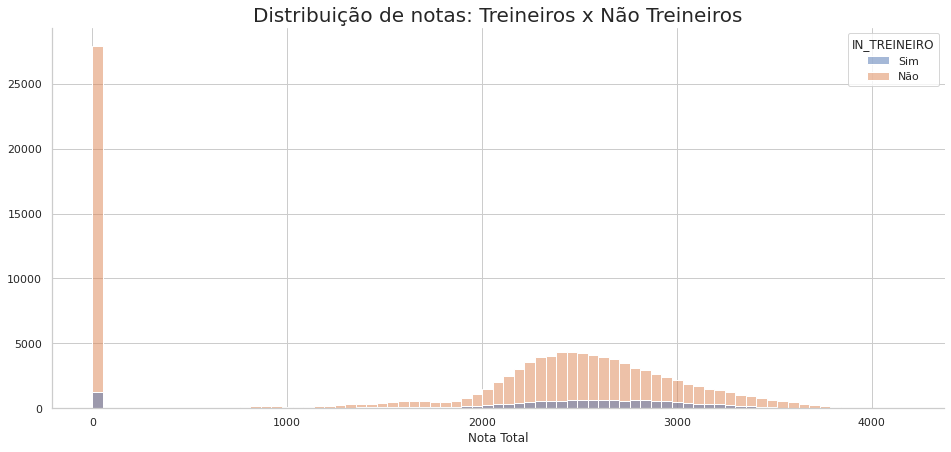

In [ ]:
plt.figure(figsize=(16, 7))

sns.histplot(amostra, x ="NU_NOTA_TOTAL", hue = "IN_TREINEIRO")

sns.despine()

plt.xlabel('Nota Total')
plt.ylabel('')
plt.title("Distribuição de notas: Treineiros x Não Treineiros", fontsize=20)
nr.set_xticklabels(renda)

plt.show()

> **Na flor da idade**

O gráfico da distribuição por idade só confirma que realmente os ausentes são, em sua maioria, jovens vestibulandos, entre 17 e vinte poucos anos.



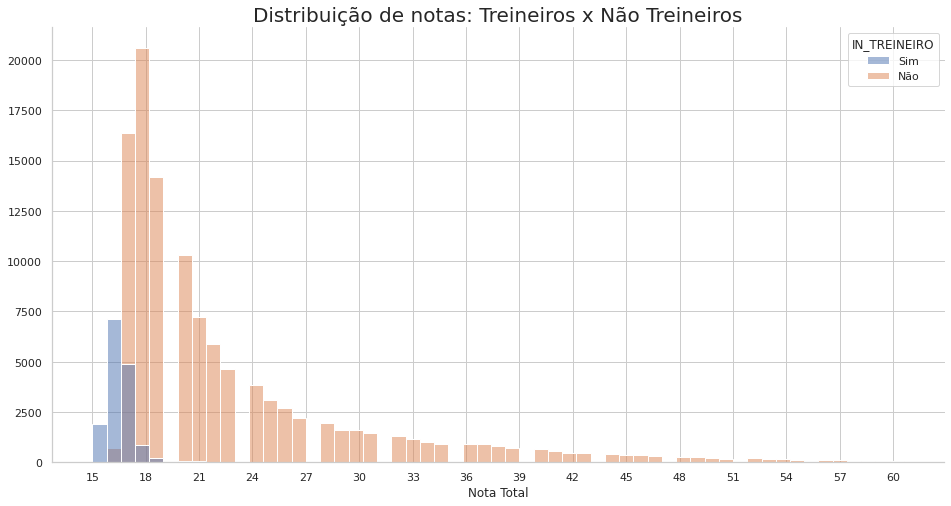

In [ ]:
plt.figure(figsize=(16, 8))

sns.histplot(amostra, x ="NU_IDADE", hue = "IN_TREINEIRO", bins = 20, binrange=(15,60), binwidth= 0.8)

sns.despine()

plt.xlabel('Nota Total')
plt.ylabel('')
plt.title("Distribuição de notas: Treineiros x Não Treineiros", fontsize=20)
plt.xticks(range(15, 63, 3)) 

plt.show()

> **~Não~ Vou de taxi

Quando vemos videos, notícias e memes dos atrasados do ENEM, dificilmente vemos uma descendo de um taxi e dando de cara com o portão se fechando ou alguém que chegou atrasado porque não achou vaga para estacionar. Sempre é alguém chegando correndo desesperadamente.

Quase 60% dos ausentes não tem carro em casa, o que significa que depende do transporte público, carona de terceiros ~ou que a fada madrinha apareça para transformar uma abóbora em carruagem~ para não virar meme antes das badaladas do sino.



Text(0.5, 1.0, 'Possui carro na residência')

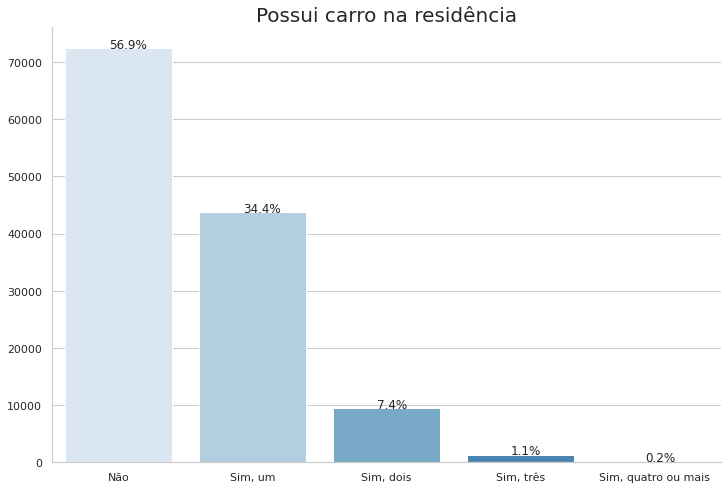

In [ ]:
#Criando um dicionário para substituir os códigos pelos valores 
Q010={'Q010':{'A': 'Não', 'B': 'Sim, um',
              'C': 'Sim, dois', 'D': 'Sim, três',
              'E': 'Sim, quatro ou mais' }}

plt.figure(figsize= (12,8))
amostra.replace(Q010, inplace=True) #trocando códigos por valores

total = float(len(amostra))
ax = sns.countplot(x="Q010", palette="Blues", data=amostra );
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.07
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)

sns.despine()
plt.xlabel('')
plt.ylabel('')
plt.title("Possui carro na residência", fontsize=20)




> **Longe de casa**

Alguns alunos não fazem a prova no seu domicílio de residência. Entre os ausentes eles representam  cerca de 1/5 do total.

Apesar de não representarem o perfil majoritário dos ausentes, é importante analisar esse grupo, já que ações concretas imediatas podem ser tomadas para mitigar essa questão. 

É comum que cidades afastadas tenham um carro, van ou micro- ônibus para levar pessoas em tratamento de saúde em hospitais. Esse meio de transporte poderia ser também utilizados pelos candidatos do ENEM daquele município.



In [ ]:
outro_municipio=(ausente.query("CO_MUNICIPIO_RESIDENCIA != CO_MUNICIPIO_PROVA"))
len(ausente.query("CO_MUNICIPIO_RESIDENCIA != CO_MUNICIPIO_ESC"))

ausente["OUTRO_MUNICIPIO"] = 'NaN'
for i, row in ausente.iterrows():
    if (row['CO_MUNICIPIO_RESIDENCIA'] != row['CO_MUNICIPIO_PROVA']):
        ausente.loc[i,'OUTRO_MUNICIPIO'] =  "Diferente da residência"
    else:
        ausente.loc[i,'OUTRO_MUNICIPIO'] =  "Mesmo município"

Text(0.5, 1.0, 'Onde faria a prova?')

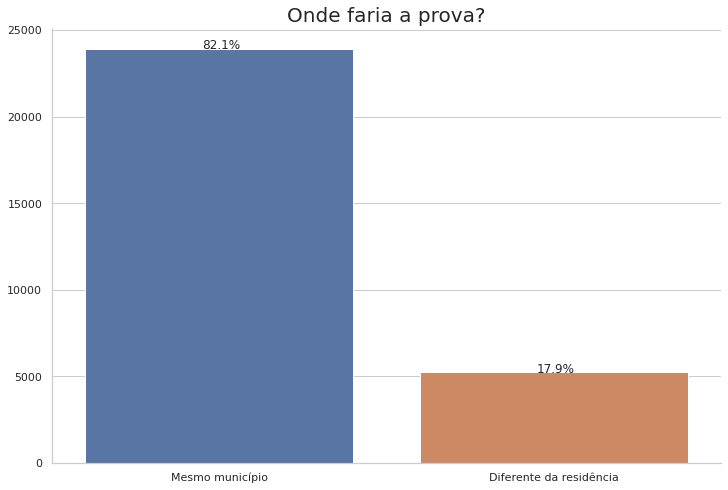

In [ ]:
plt.figure(figsize= (12,8))
total = float(len(ausente))
ax = sns.countplot(x="OUTRO_MUNICIPIO",data=ausente);
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)

sns.despine()
plt.xlabel('')
plt.ylabel('')
plt.title("Onde faria a prova?", fontsize=20)

> **E a reaplicação?**

Apenas 210 pessoas que faltaram no primeiro dia retornaram para fazer a segunda etapa, o que compressível, já que, como vimos até aqui, a maioria dos ausentes estava fazendo a prova com o intuito real de entrar numa universidade e sem as notas do primeiro dia, isso é impossível.

É possível solicitar a reaplicação da prova, caso o candidato se sinta prejudicado com relação à logística de aplicação do exame. O ponto é que o ENEM considera apenas coisas muito específicas como "problemas logísticos". 

Problemas logísticos considerados[[5]](https://agenciabrasil.ebc.com.br/educacao/noticia/2019-11/candidato-do-enem-tem-ate-esta-segunda-para-pedir-reaplicacao-de-prova):

- Desastres naturais que prejudiquem a aplicação devido ao comprometimento da infraestrutura do local;
- Falta de energia elétrica que comprometa a visibilidade da prova pela ausência de luz natural;
- Erro de execução de procedimento de aplicação pelo aplicador que leve ao comprovado prejuízo do participante.

Logo, se seu ônibus quebrar ou qualquer outra coisa te impedir de chegar a prova, é quase certo que o pedido de reaplicação será negado.



Text(0.5, 1.0, '')

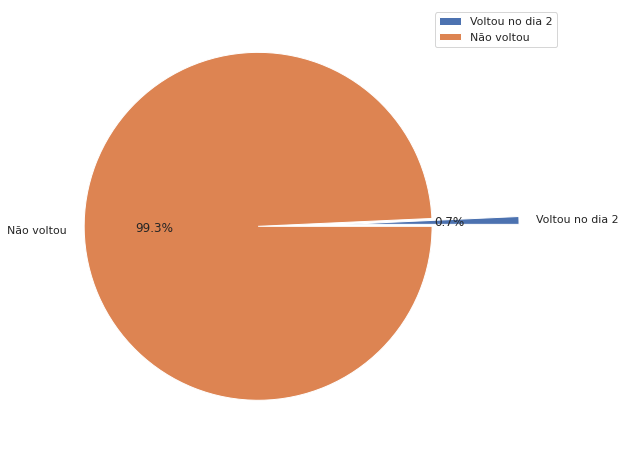

In [ ]:
dia1 = len(ausente.query('TP_PRESENCA_CH ==0 and TP_PRESENCA_LC==0'))
dia1 = dia1/len(amostra.query('TP_PRESENCA_CH ==0 and TP_PRESENCA_LC==0'))

# A diferença entre os alunos que faltaram o primeiro dia na amostra
# E a quantidade de alunos que tiraram zero, mostra  quantos alunos voltaram,
# mesmo perdendo o primeiro dia, pq esses não zeraram
df = pd.DataFrame({'':[1-dia1, dia1]}, index=['Voltou no dia 2', 'Não voltou'],)

df.plot.pie(y='', figsize= (8,8), explode = [0., .5],autopct='%1.1f%%')

plt.title("" , fontsize = 16)

# Perfil do aluno nota zero

Descobrimos até aqui algumas características das notas zeros do ENEM:

* Representam mais **1/4 dos inscritos**
* As notaz zeros representam **ausentes**
* São de famílias mais **pobres**
* São jovens entre **17 e vinte poucos anos**
* Não eram treineiros. **Pretendiam tentar uma vaga na universidade**
* A maioria é **dependente do transporte público**
* Não sabem ou não tem esperança no pedido de reaplicação.

Há ainda uma parcela de estudantes que não faz a prova no mesmo município de residência.

*É importante ressaltar que alguns outros fatores foram analisados, como sexo, estado civil, requisição de atendimento especializado (que indicam pessoa com alguma deficiência) e a presença de gestantes e lactantes entre as ausentes.

No geral, a proporção desses aspectos nos ausentes e na amostra são equivalentes, o que pode significar que os números nos ausentes apenas refletem o todo. Por exemplo, mais mulheres faltaram a prova, entretanto, a proporção de mulheres e homens entre os ausentes e inscritos é a mesma, se tem mais mulheres no grupo, é natural que mais mulheres tenham faltado.

Quando se trata de pessoas com deficiência, lactantes e gestantes, por exemplo, o número é muito pequeno frente ao todo. Com amostras tão pequenas, fica difícil tirar conclusões a respeito dessas populações.






# O que podemos fazer para ajudar?

As informações recolhidas pelo INEP pretende traçar um perfil socio-econômico muito abrangente e acaba não fazendo perguntas que ajudem a identificar possíveis ausentes. 

É necessário fazer perguntas que toquem mais no dia a dia do candidato. Por exemplo, além de perguntar apenas com quantas pessoas o aluno mora, ou se a família dele tem carro ou não, poderiam perguntar se o aluno pretende ir fazer a prova sozinho ou acompanhado, que meio de transporte ele usará para chegar na prova. Vai de a carro, bicicleta, transporte por aplicativo, ônibus, balsa, ou a pé?

Também seria importante perguntar se o aluno já se inscreveu em edições anteriores e faltou. E sim, por quê? Os alunos que pedem isenção pela segunda vez, precisam justificar sua ausência, essas justificativas também precisam ser analisadas.

Precisamos fazer perguntas melhores aos candidatos para obter respostas mais contundentes e capazes de identificar possível ausentes e então, ajudar. Oferecendo transporte, se esse for caso, levando a prova a locais mais remotos.

Os critérios para reaplicação também podem ser revistos. Em uma ciade que muitos alunos dependem do metrô, por exemplo, e ocorre algum problema técnico, alguém decide furtar os fios do metrô, os alunos serão prejudicados por que não foi um desastre natural? Se um estudante vai parar no hospital antes da prova, ele perde a chance de cursar a universidade naquele ano todo? Ou se um estudante é assaltado e levam seus documentos, impedindo a entrada dele no local de prova, é justo que ele perca essa chance?

Ainda há muita investigação a ser feita. Essa análise é apenas um pedido para que os olhares sejam lançados para esses jovens. Que o MEC, jornalistas e a sociedade brasileira possa só inquetar com o fato de mais um milhão de pessoas terem faltado o exame que pode mudar sua vida.

Números como esses devem ser motivos de celebração porque são os mais baixos em anos e sim motivo de questionamento. Afinal, ninguém comemorou o gol do Brasil no 7x1, mas, até hoje, especialistas tentam entender o que aconteceu.

# Referências:

[1] https://vestibular.mundoeducacao.uol.com.br/noticias/enem-2019-termina-com-menor-indice-de-ausentes-da-historia/340019.html
[2] https://agenciabrasil.ebc.com.br/educacao/noticia/2019-10/enem-devera-custar-r-105-52-por-participante-estima-inep#:~:text=O%20Exame%20Nacional%20do%20Ensino,%24%20105%2C52%20por%20participante.
[3]http://inep.gov.br/microdados)
[4]https://educacao.uol.com.br/noticias/2020/01/17/enem-2019-53-candidatos-tiraram-nota-mil-na-redacao-143-mil-tiraram-zero.htm
[5]https://agenciabrasil.ebc.com.br/educacao/noticia/2019-11/candidato-do-enem-tem-ate-esta-segunda-para-pedir-reaplicacao-de-prova

Dados amostrais: https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv
